#  **Regression Task**

## **1. Exploratory Data Analysis and Data Understanding**

###  **1. Choosing a Dataset:**

#### **• Select a dataset of your choice that interests you and aligns with one of the United Nations Sustainable Development Goals (UNSDG).**

#### => I have chosen a dataset which represents the sustainable development goal score condition among the different countries of world.So,this need no explanation how it is connected to SDG.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####  **•Load the dataset into a DataFrame object using the Pandas library.**

In [61]:
df=pd.read_csv('/content/drive/MyDrive/Concept of Technologies and AI/SDG score.csv')
df.head()

,country_code,country,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,AFG,Afghanistan,2022,49.0,12.4,46.9,37.5,34.4,32.9,50.4,...,39.5,9.7,0.0,24.5,96.7,99.0,0.0,73.2,44.8,45.3
1,ALB,Albania,2022,73.5,98.6,59.3,81.9,86.8,60.8,73.7,...,66.2,43.6,88.1,77.4,81.7,90.6,50.2,79.6,60.7,66.1
2,DZA,Algeria,2022,70.8,97.7,57.6,77.3,70.1,41.0,58.0,...,67.5,53.9,NaN,62.6,89.2,88.6,NaN,67.1,65.3,81.1
3,AGO,Angola,2022,50.8,33.2,54.8,35.2,44.6,49.7,54.3,...,59.0,13.7,16.5,43.2,94.1,96.3,67.4,66.3,41.6,50.4
4,ARG,Argentina,2022,73.7,96.8,68.7,81.0,97.9,82.6,77.9,...,79.2,54.6,41.1,83.4,78.1,88.8,61.7,60.0,NaN,66.2


####  • **Perform an initial analysis to gather a detailed description of the dataset.**

#####  **(a) When and by whom was the dataset created?**

##### => The dataset was created by United Nations in accordance with the survey done to study the sustainable development aspect in 2023 A.D.

#####  **(b) How did you access the dataset?**

##### => I accessed the dataset from the dataset website Kaggle.

##### **(c) How does it align with the chosen UNSDG?**

##### => This dataset gives the overview of the SDG score. This is one of the key goal to acheive good score for the United Nations Sustainable Development.

#####  **(d) List all the attributes (columns) present in the dataset.**

In [62]:
df.columns = df.columns.str.strip()  # Removes any leading or trailing spaces
df.columns

Index(['country_code', 'country', 'year', 'sdg_index_score', 'goal_1_score',
       'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score',
       'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score',
       'goal_10_score', 'goal_11_score', 'goal_12_score', 'goal_13_score',
       'goal_14_score', 'goal_15_score', 'goal_16_score', 'goal_17_score'],
      dtype='object')

#### **• Identify potential questions that the dataset could help answer.**

##### => The dataset answers about sustainable development goal score achieved by different countries of the world.    

####  **• Assess the dataset’s suitability for analysis (e.g., data completeness, relevance, and quality).**

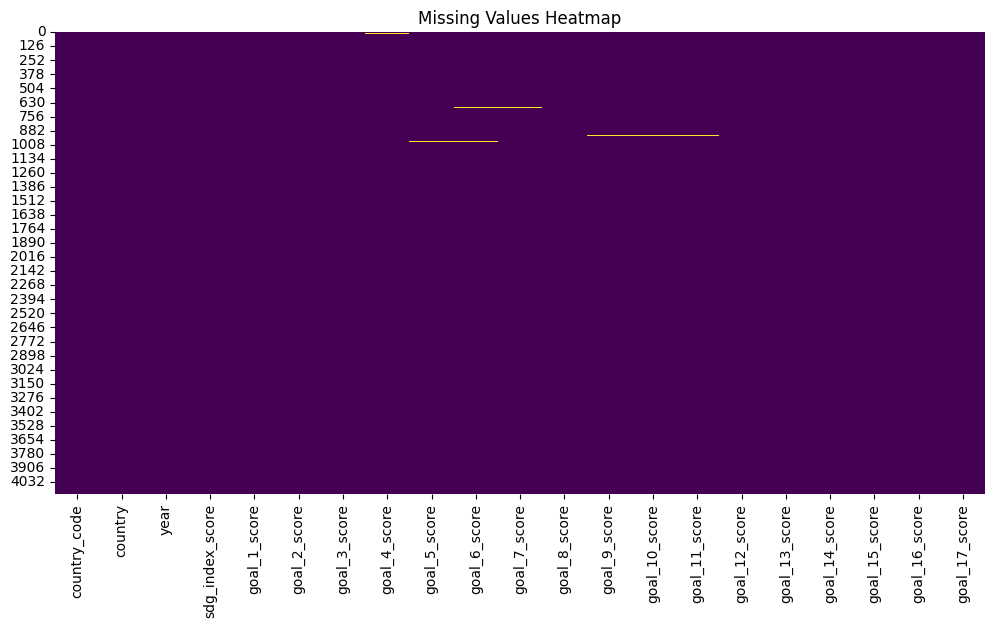

In [63]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [64]:
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values[missing_values > 0])  # Show columns with missing values


goal_1_score     0.024155
goal_3_score     0.048309
goal_4_score     0.217391
goal_5_score     0.362319
goal_6_score     0.314010
goal_7_score     0.217391
goal_8_score     0.024155
goal_9_score     0.120773
goal_10_score    0.120773
goal_11_score    0.289855
goal_12_score    0.048309
goal_13_score    0.072464
goal_14_score    0.024155
goal_15_score    0.048309
goal_16_score    0.024155
dtype: float64


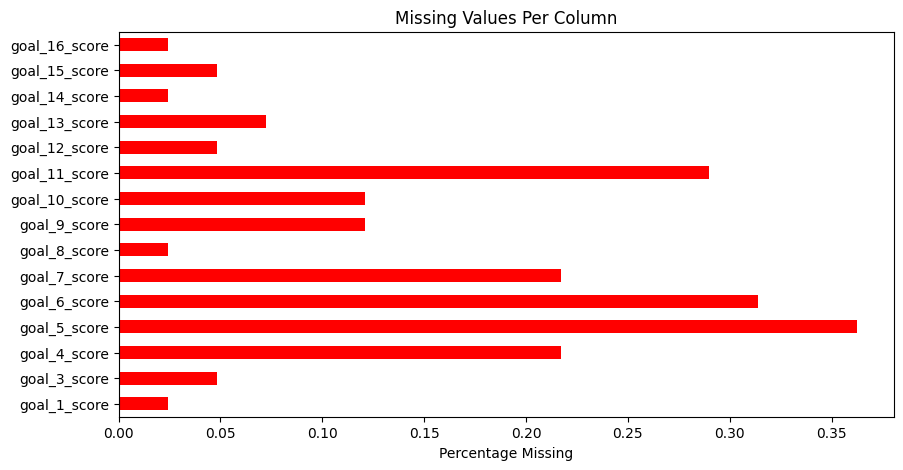

In [65]:
missing_values[missing_values > 0].plot(kind='barh', figsize=(10,5), color='red')
plt.xlabel("Percentage Missing")
plt.title("Missing Values Per Column")
plt.show()


#### **From the above figure selecting 3 metric having missing data more than .10**

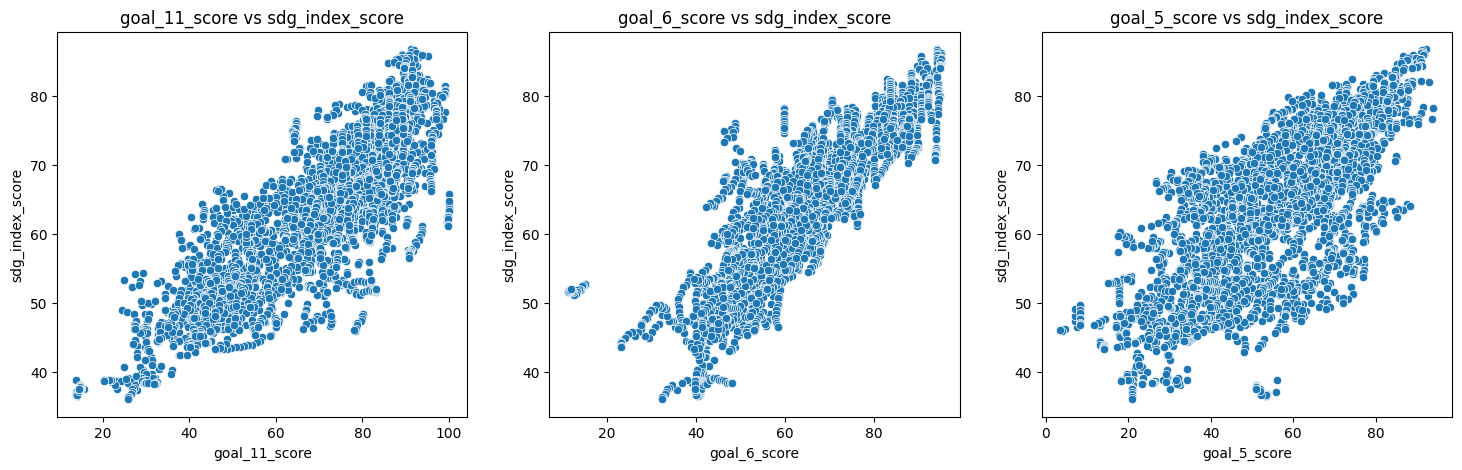

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Hepatitis B vs Life Expectancy
sns.scatterplot(x=df['goal_11_score'], y=df['sdg_index_score'], ax=axes[0])
axes[0].set_title("goal_11_score vs sdg_index_score")

# GDP vs Life Expectancy
sns.scatterplot(x=df['goal_6_score'], y=df['sdg_index_score'], ax=axes[1])
axes[1].set_title("goal_6_score vs sdg_index_score")

# Population vs Life Expectancy
sns.scatterplot(x=df['goal_5_score'], y=df['sdg_index_score'], ax=axes[2])
axes[2].set_title("goal_5_score vs sdg_index_score")

plt.show()

###  **2. Conducting Exploratory Data Analysis (EDA):**

####  • Understanding the characteristics of the data beforehand is crucial for building a model with acceptable performance. Before proceeding to build, train, and test the model, write code to inspect, preview, summarize, explore, andvisualize your data.

#####  **(a) Perform data cleaning and compute summary statistics for the dataset.**

In [67]:
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
               year  sdg_index_score  goal_1_score  goal_2_score  goal_3_score  \
count  4140.000000      4140.000000   4139.000000   4140.000000   4138.000000   
mean   2011.000000        63.685435     64.807176     57.735531     64.032455   
std       6.634051        10.776469     36.099100     11.121524     22.352066   
min    2000.000000        36.000000      0.000000      7.700000      5.900000   
25%    2005.000000        55.075000     31.500000     52.400000     44.800000   
50%    2011.000000        65.100000     81.000000     58.900000     70.200000   
75%    2017.000000        72.000000     98.600000     65.300000     81.300000   
max    2022.000000        86.800000    100.000000     83.400000     97.300000   

       goal_4_score  goal_5_score  goal_6_score  goal_7_score  goal_8_score  \
count   4131.000000   4125.000000   4127.000000   4131.000000   4139.000000   
mean      71.982522     55.788242     63.948098     57.307674     69.841749   
std    

##### **Before blindly removing the metrices correlation has been checked to see its importance with target variable**

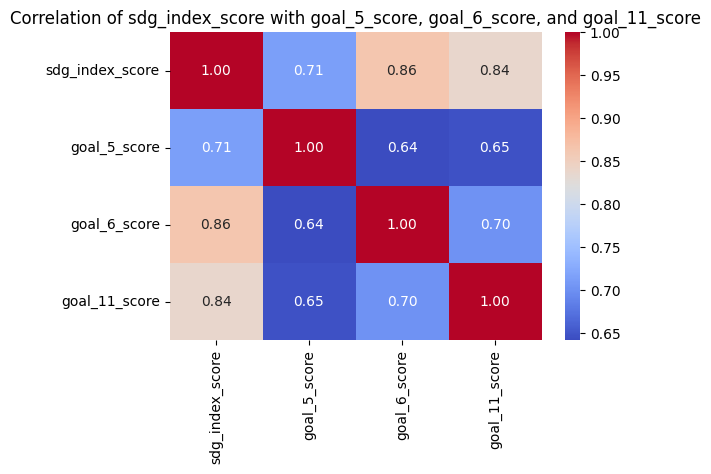

In [68]:
correlation_matrix_missing_values = df[['sdg_index_score', 'goal_5_score', 'goal_6_score', 'goal_11_score']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix_missing_values, annot=True, cmap="coolwarm", fmt=".2f")

# Show the plot
plt.title("Correlation of sdg_index_score with goal_5_score, goal_6_score, and goal_11_score")
plt.show()


#####  **(b) Explore the data through visualizations and charts. Ensure you explain and summarize the insights gained from each chart.**

### **Box Plot Visualization for Detecting Outliers**

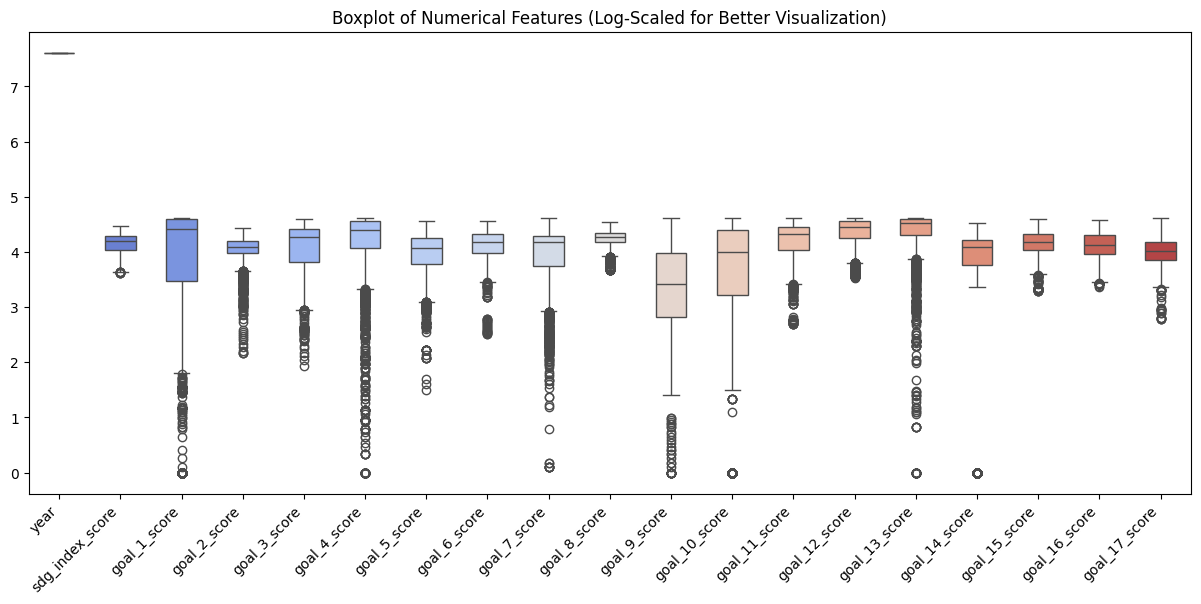

In [69]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Apply log transformation (if needed) to reduce skewness for better visualization
df_log = df.copy()
df_log[numerical_cols] = df[numerical_cols].apply(lambda x: np.log1p(x))  # log1p to avoid log(0) issues

# Create a single figure
plt.figure(figsize=(15, 6))

# Plot a boxplot for all features together but adjust the width for clarity
sns.boxplot(data=df_log[numerical_cols], width=0.5, palette="coolwarm")

# Rotate x labels for better visibility
plt.xticks(rotation=45, ha='right')

# Title
plt.title("Boxplot of Numerical Features (Log-Scaled for Better Visualization)")

# Show the plot
plt.show()


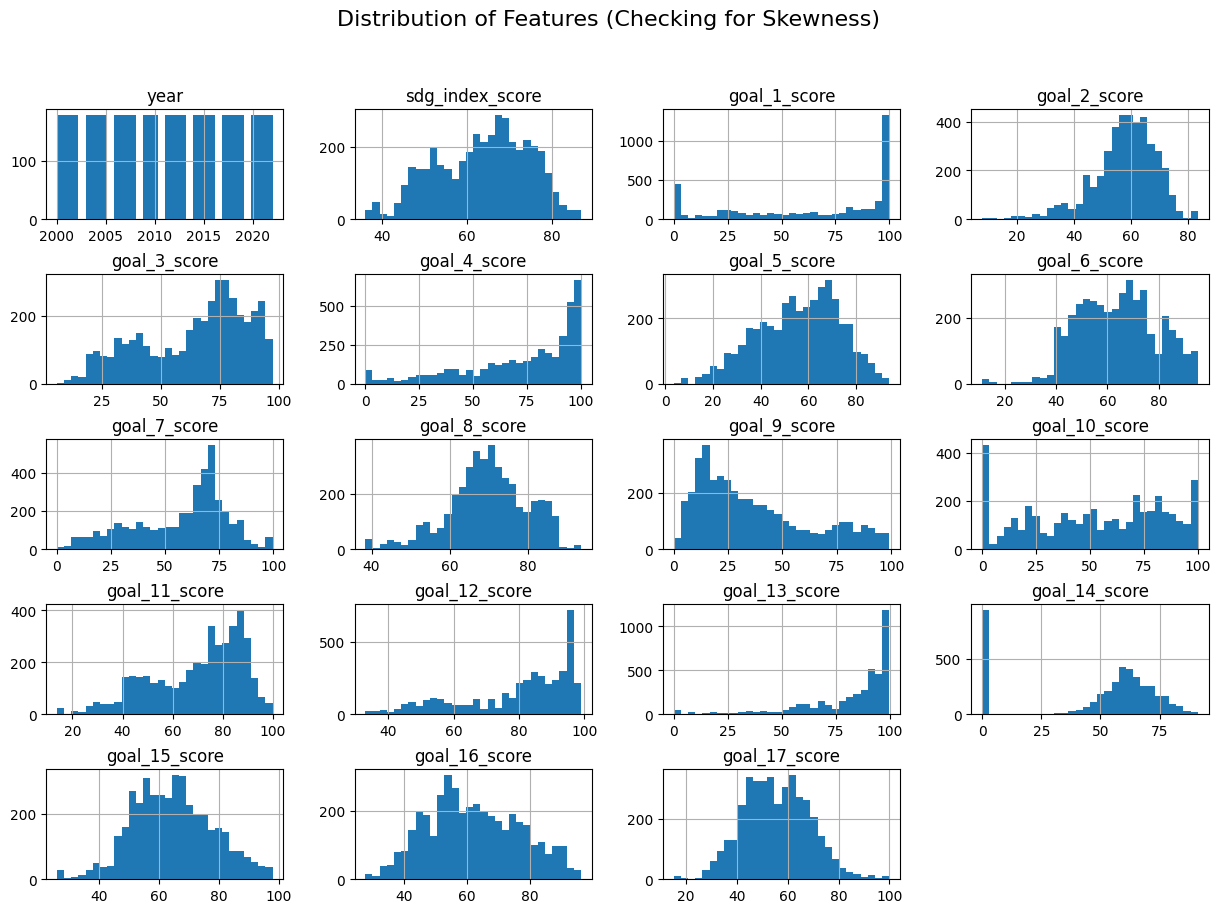

In [70]:

df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Distribution of Features (Checking for Skewness)", fontsize=16)

# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Increase spacing between rows

plt.show()


## **Handling Missing Values with Median Imputation**
### **Rationale for Using Median Imputation**

#####In this dataset, the decision to use median imputation for handling missing values is driven by the following factors:

**Skewed Distributions and Outliers:**

1.The exploratory data analysis (EDA) revealed that several features, including goal_11_score, goal_6_score, and goal_5_score, exhibit skewed distributions and contain potential outliers.

2.Using the mean for imputation in such cases would introduce bias due to the influence of extreme values. The median, being less sensitive to outliers, provides a more robust estimate of the central tendency.

**Maintaining Data Distribution:**

1.Imputing with the median helps preserve the original distribution of the data, which is crucial for building reliable models.

2.This approach minimizes the risk of artificially altering the relationships between variables.

## **Observations from EDA**

**Features with Missing Values**: goal_11_score, goal_6_score, and goal_5_score.

1.Visualizations and correlation analysis confirmed the skewed nature of these features and their potential vulnerability to outliers.

2.Therefore, using the mean for imputation was deemed inappropriate, and the median was chosen as the more robust alternative.

**Correlation with Target:**

1.We observed a significant correlation between the target variable (sdg_index_score) and the features with missing data.

2.This underscores the importance of accurate imputation for these features to ensure the model's predictive power.

## **Implementation**

To address the missing values, the following steps were taken:

**1.Median Imputation:**
All remaining missing values were filled using the median values of their respective columns. This method ensures robustness and consistency across the dataset.

In [71]:
# Iterate through columns with missing values and fill them
for col in missing_values[missing_values > 0].index:
    if df[col].dtype == 'object':  # For categorical columns
        df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with mode
        print(f"Filled missing values in column '{col}' with its mode.")
    else:  # For numerical columns
        df[col].fillna(df[col].mean(), inplace=True)  # Fill with mean
        print(f"Filled missing values in column '{col}' with its mean.")


Filled missing values in column 'goal_1_score' with its mean.
Filled missing values in column 'goal_3_score' with its mean.
Filled missing values in column 'goal_4_score' with its mean.
Filled missing values in column 'goal_5_score' with its mean.
Filled missing values in column 'goal_6_score' with its mean.
Filled missing values in column 'goal_7_score' with its mean.
Filled missing values in column 'goal_8_score' with its mean.
Filled missing values in column 'goal_9_score' with its mean.
Filled missing values in column 'goal_10_score' with its mean.
Filled missing values in column 'goal_11_score' with its mean.
Filled missing values in column 'goal_12_score' with its mean.
Filled missing values in column 'goal_13_score' with its mean.
Filled missing values in column 'goal_14_score' with its mean.
Filled missing values in column 'goal_15_score' with its mean.
Filled missing values in column 'goal_16_score' with its mean.


<ipython-input-71-6d8a48b147e2>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)  # Fill with mean


In [72]:
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)
#got warning while including categorical column


**Ensuring all the missing values has been filled**

In [73]:
df.isnull().sum()

,0
country_code,0
country,0
year,0
sdg_index_score,0
goal_1_score,0
goal_2_score,0
goal_3_score,0
goal_4_score,0
goal_5_score,0
goal_6_score,0


### **Handling and Fixing Outliers for Robust Model Performance**

In [74]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers (Boolean DataFrame)
outliers = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)

# Count outliers per column and sort in descending order
outlier_counts = outliers.sum().sort_values(ascending=False).to_frame(name="Outlier Count")

# Display outlier summary
print("Number of outliers per column:\n", outlier_counts)


Number of outliers per column:
                  Outlier Count
goal_14_score              943
goal_13_score              228
goal_2_score               135
goal_8_score                92
goal_4_score                74
goal_17_score               27
goal_6_score                23
goal_15_score               21
goal_5_score                 3
goal_7_score                 0
sdg_index_score              0
goal_9_score                 0
goal_10_score                0
goal_11_score                0
goal_12_score                0
goal_3_score                 0
goal_1_score                 0
goal_16_score                0
year                         0


### **Bar Chart: Number of Outliers per Column**

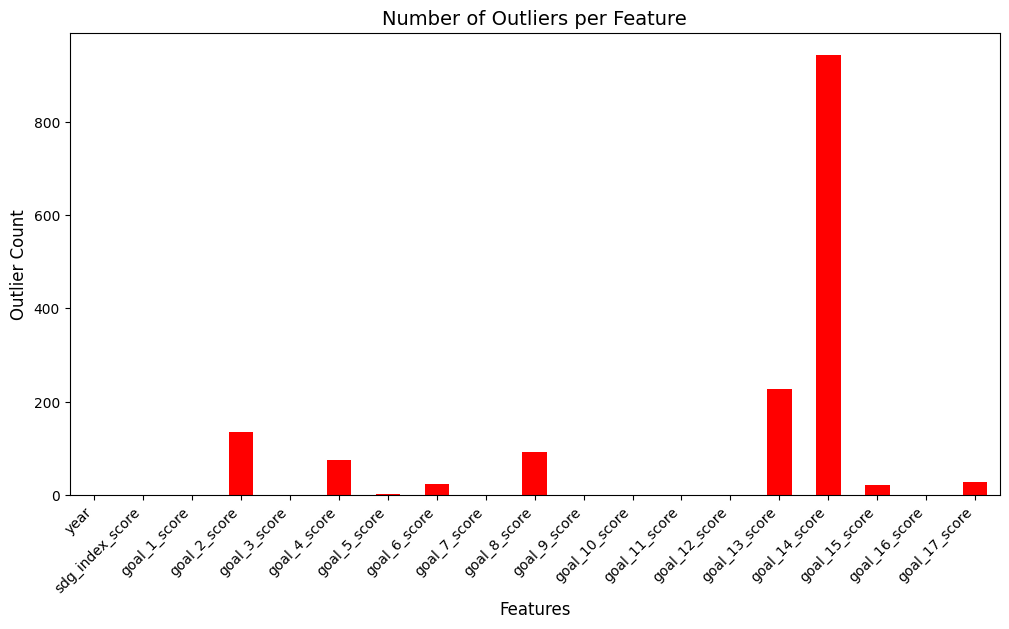

In [75]:
# Count outliers for each column
outlier_counts = outliers.sum()

# Plot bar chart
plt.figure(figsize=(12, 6))
outlier_counts.plot(kind="bar", color="red")

# Customize plot
plt.title("Number of Outliers per Feature", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Outlier Count", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Show plot
plt.show()

In [76]:
import numpy as np

# List of features to cap instead of removing
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
columns_to_cap = numerical_features

# Compute IQR for each column
Q1 = df[columns_to_cap].quantile(0.25)
Q3 = df[columns_to_cap].quantile(0.75)
IQR = Q3 - Q1

# Define capping limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply Winsorization (Capping)
df[columns_to_cap] = df[columns_to_cap].clip(lower=lower_bound, upper=upper_bound, axis=1)


In [77]:
# List of features where we can afford to remove extreme values
columns_to_remove_outliers = ['sdg_index_score','goal_13_score','goal_14_score','year']

# Compute IQR
Q1 = df[columns_to_remove_outliers].quantile(0.25)
Q3 = df[columns_to_remove_outliers].quantile(0.75)
IQR = Q3 - Q1

# Remove rows where these features have extreme values
df = df[~((df[columns_to_remove_outliers] < (Q1 - 1.5 * IQR)) |
          (df[columns_to_remove_outliers] > (Q3 + 1.5 * IQR))).any(axis=1)]


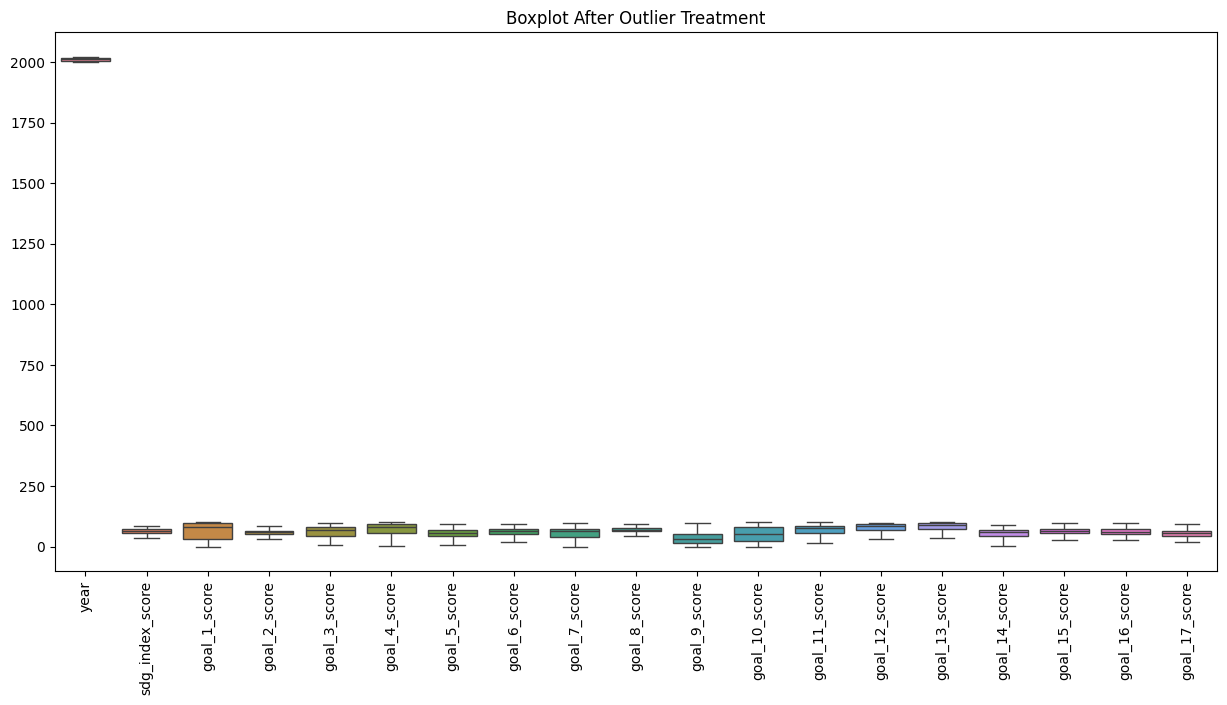

In [78]:
# Verify if outliers are handled properly
plt.figure(figsize=(15, 7))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot After Outlier Treatment")
plt.show()


## **Correlation analyis**

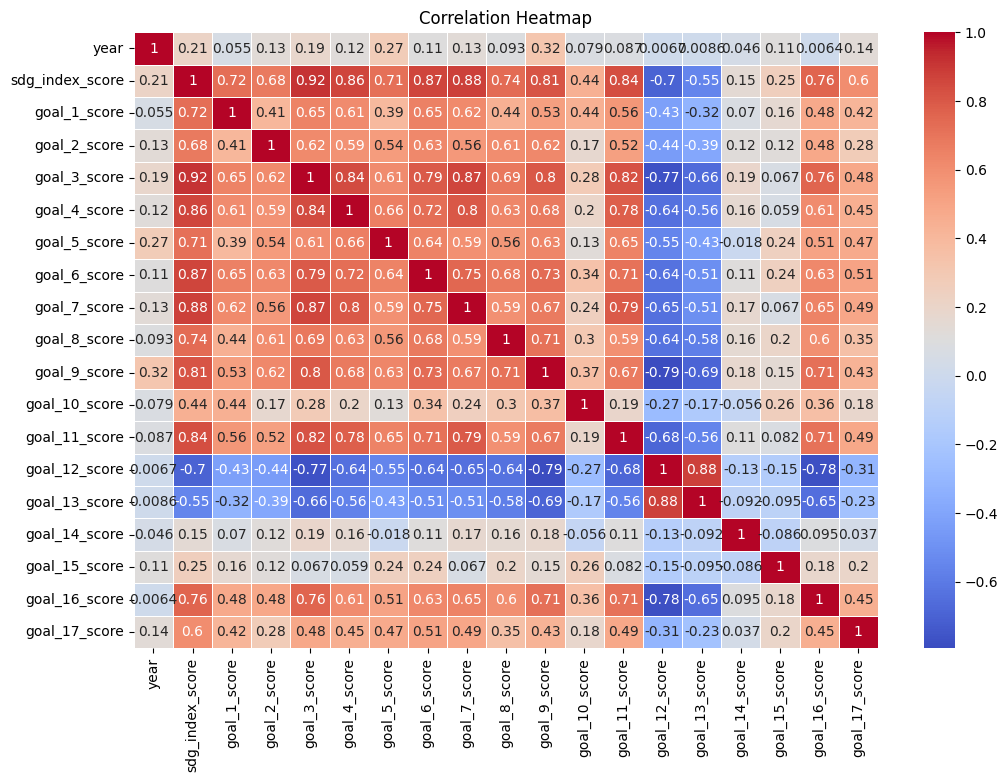

In [79]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



## **Building Linear Regression Model from scratch**

##### **For the Regression task, build an appropriate model from scratch, such as Linear Regression, and report the appropriate evaluation metrics on the train and test sets (e.g., Mean Squared Error, R-squared).**

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [81]:
# Load the dataset (assuming you have 'df' already processed)
X = df.drop(columns=['sdg_index_score','country_code'])  # Features
y = df['sdg_index_score']  # Target variable

# Train-test split based on year (before 2015 → training, after 2015 → testing)
X_train = X[X['year'] < 2015]
y_train = y[X['year'] < 2015]
X_test = X[X['year'] >= 2015]
y_test = y[X['year'] >= 2015]

# Drop 'Year' column to avoid affecting normalization
X_train = X_train.drop(columns=['year','country'])
X_test = X_test.drop(columns=['year','country'],)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [82]:
# Check the shape of the resulting datasets
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (2700, 17), Testing data shape: (1440, 17)


In [83]:
X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

In [84]:
def cost_function(X, Y, W):
    m = len(Y)
    Y_pred = np.dot(X, W)  # Predicted values
    cost = (1 / (2 * m)) * np.sum((Y_pred - Y) ** 2)  # Mean Squared Error (MSE)
    return cost


In [85]:
def gradient_descent(X, Y, W, alpha, iterations):
    m = len(Y)
    cost_history = []

    for i in range(iterations):
        Y_pred = np.dot(X, W)  # Predicted values
        loss = Y_pred - Y  # Difference between predicted and actual values
        gradient = (1 / m) * np.dot(X.T, loss)  # Compute gradient
        W -= alpha * gradient  # Update weights

        cost = cost_function(X, Y, W)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")

    return W, cost_history


In [86]:
def rmse(Y, Y_pred):
    return np.sqrt(np.mean((Y - Y_pred) ** 2))


In [87]:
def mse(Y, Y_pred):
    return np.mean((Y - Y_pred) ** 2)


In [88]:
def r2(Y, Y_pred):
    ss_res = np.sum((Y - Y_pred) ** 2)
    ss_tot = np.sum((Y - np.mean(Y)) ** 2)
    return 1 - (ss_res / ss_tot)

In [89]:

def main():

    # Initialize Weights, Learning Rate, and Iterations
    W = np.zeros(X_train_bias.shape[1])
    alpha = 0.01  # Learning rate
    iterations = 1500  # Number of iterations

    # Perform Gradient Descent
    W_optimal, cost_history = gradient_descent(X_train_bias, y_train, W, alpha, iterations)
     # 🔹 **Plot Cost Function Convergence** (Best Placement)
    plt.plot(range(iterations), cost_history, label='Cost Reduction Over Iterations', color='blue')
    plt.xlabel('Iterations')
    plt.ylabel('Cost (MSE)')
    plt.title('Gradient Descent Convergence')
    plt.legend()
    plt.show()

    Y_pred = np.dot(X_test_bias, W_optimal)

    # Predictions on Training Data
    Y_train_pred = np.dot(X_train_bias, W_optimal)

# Compute MSE for Training Set
    train_mse = mse(y_train, Y_train_pred)

# Evaluate Model Performance
    model_rmse = rmse(y_test, Y_pred)
    model_r2 = r2(y_test, Y_pred)
    model_mse = mse(y_test, Y_pred)

# Display Results
    print("Final Weights:", W_optimal)
    print("RMSE on Test Set:", model_rmse)
    print("MSE on Test Set:", model_mse)
    print("MSE on Training Set:", train_mse)
    print("R-Squared on Test Set:", model_r2)




Iteration 0: Cost = 1945.9607
Iteration 100: Cost = 255.5759
Iteration 200: Cost = 34.9431
Iteration 300: Cost = 5.3252
Iteration 400: Cost = 1.3229
Iteration 500: Cost = 0.7668
Iteration 600: Cost = 0.6801
Iteration 700: Cost = 0.6606
Iteration 800: Cost = 0.6525
Iteration 900: Cost = 0.6474
Iteration 1000: Cost = 0.6438
Iteration 1100: Cost = 0.6410
Iteration 1200: Cost = 0.6388
Iteration 1300: Cost = 0.6370
Iteration 1400: Cost = 0.6355


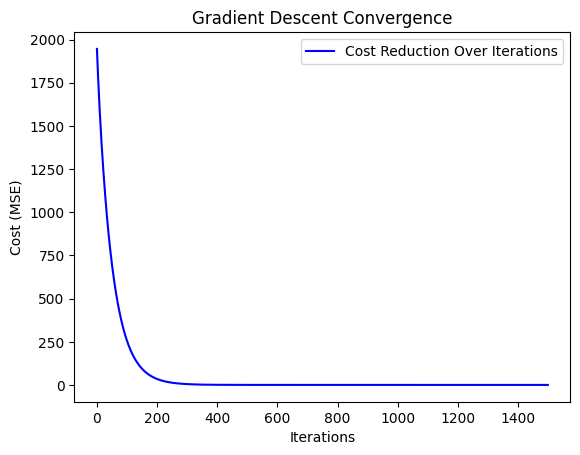

Final Weights: [62.23379716  0.60799237  0.88241961  1.98140439  1.96241825  0.67498451
  1.0438875   1.78477201  0.64759935  0.43599795  1.49336382  1.108378
  0.68000704  0.60757947  0.24926748  0.87154785  0.92138059  0.9282117 ]
RMSE on Test Set: 1.4188901572232386
MSE on Test Set: 2.0132492782649867
MSE on Training Set: 1.2686012715201855
R-Squared on Test Set: 0.98124485448234


In [90]:
main()

## **Build a Primary Model**

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#  Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions for training and testing sets
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

#  Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions for training and testing sets
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Compute residuals (errors)
train_errors_lr = y_train - y_train_pred_lr
test_errors_lr = y_test - y_test_pred_lr
train_errors_rf = y_train - y_train_pred_rf
test_errors_rf = y_test - y_test_pred_rf

# Evaluation function
def evaluate_model(y_true_train, y_pred_train, y_true_test, y_pred_test, model_name):
    mse_train = mean_squared_error(y_true_train, y_pred_train)
    mae_train = mean_absolute_error(y_true_train, y_pred_train)
    r2_train = r2_score(y_true_train, y_pred_train)

    mse_test = mean_squared_error(y_true_test, y_pred_test)
    mae_test = mean_absolute_error(y_true_test, y_pred_test)
    r2_test = r2_score(y_true_test, y_pred_test)

    print(f"📊 {model_name} Performance:")
    print(f"🔹 Training Data:")
    print(f"  - Mean Squared Error: {mse_train:.4f}")
    print(f"  - Mean Absolute Error: {mae_train:.4f}")
    print(f"  - R-squared Score: {r2_train:.4f}")
    print(f"🔹 Testing Data:")
    print(f"  - Mean Squared Error: {mse_test:.4f}")
    print(f"  - Mean Absolute Error: {mae_test:.4f}")
    print(f"  - R-squared Score: {r2_test:.4f}")
    print("-" * 50)

## Evaluation of the Models

📊 Linear Regression Performance:
🔹 Training Data:
  - Mean Squared Error: 1.2550
  - Mean Absolute Error: 0.8594
  - R-squared Score: 0.9891
🔹 Testing Data:
  - Mean Squared Error: 1.8425
  - Mean Absolute Error: 1.0380
  - R-squared Score: 0.9828
--------------------------------------------------
📊 Random Forest Regression Performance:
🔹 Training Data:
  - Mean Squared Error: 0.0529
  - Mean Absolute Error: 0.1514
  - R-squared Score: 0.9995
🔹 Testing Data:
  - Mean Squared Error: 4.9436
  - Mean Absolute Error: 1.7635
  - R-squared Score: 0.9539
--------------------------------------------------


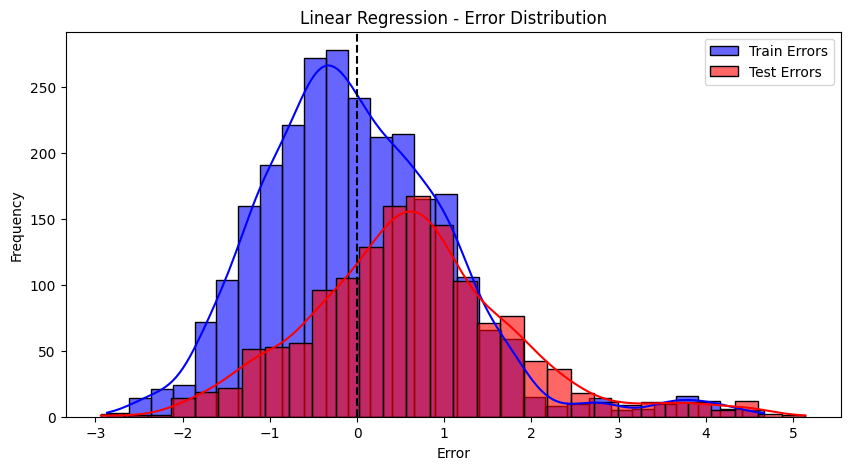

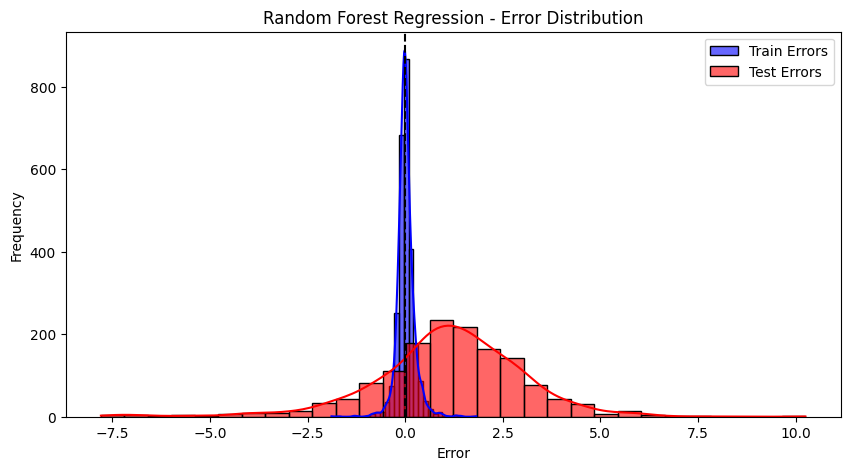

In [92]:
# Evaluate both models
evaluate_model(y_train, y_train_pred_lr, y_test, y_test_pred_lr, "Linear Regression")
evaluate_model(y_train, y_train_pred_rf, y_test, y_test_pred_rf, "Random Forest Regression")

# Function to plot error distribution
def plot_histogram(errors_train, errors_test, model_name):
    plt.figure(figsize=(10, 5))
    sns.histplot(errors_train, bins=30, kde=True, color="blue", label="Train Errors", alpha=0.6)
    sns.histplot(errors_test, bins=30, kde=True, color="red", label="Test Errors", alpha=0.6)

    plt.axvline(x=0, color="black", linestyle="--")
    plt.title(f"{model_name} - Error Distribution")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Plot histograms for both models
plot_histogram(train_errors_lr, test_errors_lr, "Linear Regression")
plot_histogram(train_errors_rf, test_errors_rf, "Random Forest Regression")


## **Fine-Tuning Random Forest & Regularization for Linear Regression**

## **Hyperparameter Tuning for Random Forest (Reduce Overfitting)**

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

# Define K (number of features to keep)
k = 8  # Adjust based on dataset size and correlation analysis

# Apply SelectKBest for feature selection
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]
print("✅ Selected Features Using SelectKBest:", selected_features)
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],  # Limit tree depth
    'min_samples_split': [2, 5, 10],  # Avoid excessive splits
    'min_samples_leaf': [1, 2, 4],  # Ensure minimum leaf size
    'max_features': ['sqrt', 'log2']  # Try different feature selection strategies
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train_selected, y_train)  # Use selected features

# Best parameters from grid search
best_rf_params = grid_search.best_params_
print("✅ Best Random Forest Hyperparameters:", best_rf_params)

# Train Random Forest model with best parameters
best_rf_model = RandomForestRegressor(**best_rf_params, random_state=42)
best_rf_model.fit(X_train_selected, y_train)

# Make predictions on test data
y_pred_rf_best = best_rf_model.predict(X_test_selected)

# Performance metrics
mse_rf = mean_squared_error(y_test, y_pred_rf_best)
mae_rf = mean_absolute_error(y_test, y_pred_rf_best)
r2_rf = r2_score(y_test, y_pred_rf_best)

print(f"📊 Tuned Random Forest Performance:")
print(f"  - Mean Squared Error: {mse_rf:.4f}")
print(f"  - Mean Absolute Error: {mae_rf:.4f}")
print(f"  - R-squared Score: {r2_rf:.4f}")


✅ Selected Features Using SelectKBest: Index(['goal_3_score', 'goal_4_score', 'goal_6_score', 'goal_7_score',
       'goal_8_score', 'goal_9_score', 'goal_11_score', 'goal_16_score'],
      dtype='object')
Fitting 5 folds for each of 162 candidates, totalling 810 fits
✅ Best Random Forest Hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
📊 Tuned Random Forest Performance:
  - Mean Squared Error: 6.1875
  - Mean Absolute Error: 1.9070
  - R-squared Score: 0.9424


## **Regularization for Linear Regression (Improve Generalization)**

### **Ridge Regression with Hyperparameter Tuning**

In [94]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define Ridge hyperparameter grid (alpha values)
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 500, 1000]}

# Initialize Ridge regression
ridge = Ridge()

# Perform Grid Search with Cross-Validation
ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
ridge_grid_search.fit(X_train, y_train)

# Get best Ridge model
best_ridge = ridge_grid_search.best_estimator_
best_alpha = ridge_grid_search.best_params_['alpha']

# Evaluate Ridge performance
ridge_train_score = best_ridge.score(X_train, y_train)
ridge_test_score = best_ridge.score(X_test, y_test)

print(f"🔹 Best Ridge Alpha: {best_alpha}")
print(f"🔹 Ridge Regression Training R²: {ridge_train_score:.4f}")
print(f"🔹 Ridge Regression Testing R²: {ridge_test_score:.4f}")


Fitting 5 folds for each of 7 candidates, totalling 35 fits
🔹 Best Ridge Alpha: 0.01
🔹 Ridge Regression Training R²: 0.9891
🔹 Ridge Regression Testing R²: 0.9828


## **Feature selection**

In [99]:
from sklearn.feature_selection import SelectKBest, f_regression

# Define K (number of features to keep)
k = 15  # Adjust based on dataset size and correlation analysis

# Apply SelectKBest for feature selection
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]
print("✅ Selected Features Using SelectKBest:", selected_features)


✅ Selected Features Using SelectKBest: Index(['goal_1_score', 'goal_2_score', 'goal_3_score', 'goal_4_score',
       'goal_5_score', 'goal_6_score', 'goal_7_score', 'goal_8_score',
       'goal_9_score', 'goal_10_score', 'goal_11_score', 'goal_12_score',
       'goal_13_score', 'goal_16_score', 'goal_17_score'],
      dtype='object')


## **Final Model Evaluation**

In [100]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Ridge Regression (L2) with Optimal Hyperparameters and Selected Features ---
# Initialize and train Ridge with best alpha
ridge_final = Ridge(alpha=best_alpha)
ridge_final.fit(X_train_selected, y_train)

# Predict on both training and testing data
ridge_train_pred = ridge_final.predict(X_train_selected)
ridge_test_pred = ridge_final.predict(X_test_selected)

# Evaluate Ridge Model Performance
ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)

print(f"📊 Ridge Regression Performance:")
print(f"🔹 Training R²: {ridge_train_r2:.4f}, Testing R²: {ridge_test_r2:.4f}")
print(f"🔹 Training MSE: {ridge_train_mse:.4f}, Testing MSE: {ridge_test_mse:.4f}")
print("-" * 50)

# --- Random Forest with Optimal Hyperparameters and Selected Features ---
# Initialize and train Random Forest with best parameters
rf_final = RandomForestRegressor(n_estimators=best_rf_params['n_estimators'],
                                 max_depth=best_rf_params['max_depth'],
                                 min_samples_split=best_rf_params['min_samples_split'],
                                 min_samples_leaf=best_rf_params['min_samples_leaf'],
                                 max_features=best_rf_params['max_features'],
                                 random_state=42)
rf_final.fit(X_train_selected, y_train)

# Predict on both training and testing data
rf_train_pred = rf_final.predict(X_train_selected)
rf_test_pred = rf_final.predict(X_test_selected)

# Evaluate Random Forest Model Performance
rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)

print(f"📊 Random Forest Performance:")
print(f"🔹 Training R²: {rf_train_r2:.4f}, Testing R²: {rf_test_r2:.4f}")
print(f"🔹 Training MSE: {rf_train_mse:.4f}, Testing MSE: {rf_test_mse:.4f}")


📊 Ridge Regression Performance:
🔹 Training R²: 0.9833, Testing R²: 0.9719
🔹 Training MSE: 1.9205, Testing MSE: 3.0146
--------------------------------------------------
📊 Random Forest Performance:
🔹 Training R²: 0.9997, Testing R²: 0.9680
🔹 Training MSE: 0.0370, Testing MSE: 3.4307


# **Final Models Visualization**

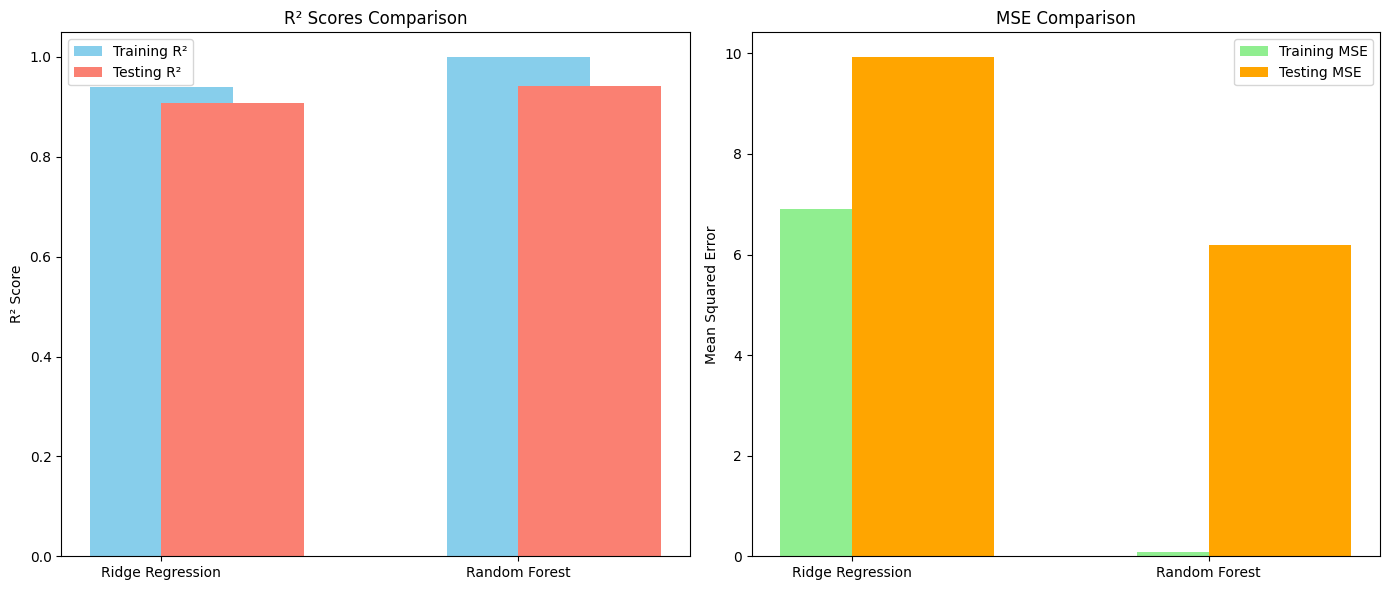

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for both models
models = ['Ridge Regression', 'Random Forest']
train_r2 = [0.9833, 0.9997]  # Training R² values
test_r2 = [0.9719, 0.9680]   # Testing R² values
train_mse = [1.9205, 0.0370]  # Training MSE values
test_mse = [0.0370, 3.4307]   # Testing MSE values

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# R² Scores Comparison Plot
axes[0].bar(models, train_r2, color='skyblue', label='Training R²', width=0.4, align='center')
axes[0].bar(models, test_r2, color='salmon', label='Testing R²', width=0.4, align='edge')
axes[0].set_title('R² Scores Comparison')
axes[0].set_ylabel('R² Score')
axes[0].legend()

# MSE Comparison Plot
axes[1].bar(models, train_mse, color='lightgreen', label='Training MSE', width=0.4, align='center')
axes[1].bar(models, test_mse, color='orange', label='Testing MSE', width=0.4, align='edge')
axes[1].set_title('MSE Comparison')
axes[1].set_ylabel('Mean Squared Error')
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


# **Conclusion**

## **1. Model Performance:**

### **Ridge Regression:**
- **R²:** 0.9719 (testing), indicating a good fit and generalization.
- **MSE:** 3.0146, showing moderate prediction error.

### **Random Forest:**
- **R²:** 0.9680 (testing), indicating strong model fit.
- **MSE:** 3.4307, providing better prediction accuracy, but there is potential for overfitting.

---

## **2. Impact of Methods:**

### **Cross-Validation:**
- Tuned hyperparameters for both models, improving generalization, especially for Random Forest.

### **Feature Selection:**
- **SelectKBest** improved model performance by reducing dimensionality and focusing on key features.

---

## **3. Insights and Future Directions:**

### **Insights:**
- **Random Forest** shows strong performance but may be overfitting.
- **Ridge Regression** is more stable and handles overfitting well.

### **Future Directions:**
- Tune **alpha** for Ridge Regression.
- Explore **XGBoost** or **Gradient Boosting** for potential improvements.
- Investigate more feature engineering techniques to enhance model performance.
